# NETWORK ANAMOLY DETECTION

A Telecom company is looking  for to build a AI Model to detect network intrusion system based the available past data

- Explore the past data and perform EDA analysis  
- Build Single Class and Multi-Class Model 
- Evaluate model with multiple parameters and tune Hyper parameters to increase the model accuracy.
- Select the Best Model & drivers
- Present your findings & conclusions

# INDEX 

- <a href='#1'>1. Import DataSets</a>
- <a href='#2'>2. Data Cleansing</a>
- <a href='#3'>3. Data Preprocessing</a>
- <a href='#3'>4. Exploratory Data Analysis</a>
    - <a href='#3.1'>3.1. Piechart - Network Attack by Class Type</a>
    - <a href='#3.2'>3.2. Plotchart - Network Attack by DOS Class</a>
    - <a href='#3.3'>3.3. Plotchart - Network Attack by PROBE Class</a>
    - <a href='#3.4'>3.4. Plotchart - Network Attack by R2L Class</a>
    - <a href='#3.5'>3.5. Plotchart - Network Attack by U2R Class</a>
    - <a href='#3.6'>3.6. Segmented Plotchart - Network Attack by Protocol Type</a>
    - <a href='#3.7'>3.7. Correlation Matrix</a>
    - <a href='#3.8'>3.8. Summary</a>
- <a href='#5'>5. Binomial Classification</a>
    - <a href='#5.1'>5.1. Logistic Regression with Recurvise Feature Elimination</a>
    - <a href='#5.2'>5.2. Logistic Regression with PCA</a>
    - <a href='#5.3'>5.3. Random Forest with PCA</a>
    - <a href='#5.4'>5.4. Random Forest without PCA</a>
    - <a href='#5.5'>5.5. Summary</a>
    - <a href='#5.6'>5.6. Key Anomaly Indicators</a>
- <a href='#6'>6. Multinomial  Classification</a>
    - <a href='#6.1'>6.1. Logistic Regression Model with Recurvise Feature Elimination</a>
    - <a href='#6.2'>6.2. Logistic Regression Model Building with PCA</a>
    - <a href='#6.3'>6.3. Random Forest with PCA </a>
    - <a href='#6.4'>6.4. Random Forest without PCA</a>
    - <a href='#6.5'>6.5. Summary</a>
    - <a href='#6.6'>6.6. Key Anomaly Indicators</a>
- <a href='#7'>7. Summary of Models</a>
- <a href='#8'>8. Business recommendations</a>

### Importing Libraries

In [ ]:
####Import required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


sns.set(style="white")
%matplotlib inline

## <a id = '1'> 1. Importing Datasets </a>

In [4]:
#User defined function to remove spaces and convert them to lowercase
def convertstriplower(x):
    return x.strip().lower()

In [5]:
####Load the Dataset 
### Have merged the Test.txt and Train.txt
### Added the headers and saved them as .csv
nad_df = pd.read_csv("merged.csv")

## make attack feature to lower case
nad_df['attack'] = nad_df['attack'].apply(convertstriplower)
## rename attack feature to attack_type
nad_df = nad_df.rename(columns={"attack":"attack_type"})

In [6]:
#find the shape of the data frame
nad_df.shape

(148517, 43)

In [7]:
## display top rows and glance the data
nad_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
####add a new feature called attack and make all attack_type = Normal to 0 and otherwise make it as 1
nad_df['attack']=1
nad_df.loc[(nad_df.attack_type=='normal'),'attack']=0
pd.DataFrame(nad_df.groupby("attack").agg({'attack':['count']}))

,attack
,count
attack,
0,77054
1,71463


In [9]:
## Explore t he data by attack type
pd.DataFrame(nad_df.groupby("attack_type").agg({'attack_type':['count']}))

,attack_type
,count
attack_type,
apache2,737
back,1315
buffer_overflow,50
ftp_write,11
guess_passwd,1284
httptunnel,133
imap,12
ipsweep,3740


In [10]:
## Add a new feature called Attack Class and classify them based on the attack type
####1 - DOS 
####2 - Probe
####3 - R2L
####4 - U2R

## Assumptions 
## Few of the attack type not found in the list provided , so assumed the below types are part of the attack class 
## mailbomb belongs to  DOS
## named belongs to R2l
## ps belongs to u2r
## saint belongs to Probe
## worm belongs toDOS

normal=['normal']
dos =['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm','processtable','worm(10)','mailbomb','worm']
probe =['satan','ipsweep','nmap','portsweep','mscan','sanit(6)','saint']
r2l =['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack','httptunnel','sendmail','named(16)','named']
u2r =['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps(7)','ps']

nad_df['attack_class']=-1
nad_df.loc[(nad_df['attack_type'].isin(normal)),'attack_class']=0
nad_df.loc[(nad_df['attack_type'].isin(dos)),'attack_class']=1
nad_df.loc[(nad_df['attack_type'].isin(probe)),'attack_class']=2
nad_df.loc[(nad_df['attack_type'].isin(r2l)),'attack_class']=3
nad_df.loc[(nad_df['attack_type'].isin(u2r)),'attack_class']=4

pd.DataFrame(nad_df.groupby("attack_class").agg({'attack_class':['count']}))


,attack_class
,count
attack_class,
0,77054
1,53387
2,14077
3,3880
4,119


In [11]:
##Convert them to CSV if in case need further analysis
##nad_df.to_csv('nad_df_merged.csv')

In [12]:
## Check the dataset where data are spread across for both clauses
## we can see thata dataset is balanced.
attack = (sum(nad_df['attack'])/len(nad_df['attack'].index))*100
attack

48.11772389692762

## <a id = '2'> 2. Data Cleansing </a>

In [13]:
####Check is there any columns that are all having null values
allnulls=nad_df.loc[:, (nad_df.isnull().all())]
allnulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Empty DataFrame

In [14]:
####Check all columns that has only 1 unique value 
allunique=nad_df.loc[:,(nad_df.nunique()==1)]
allunique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 1 columns):
num_outbound_cmds    148517 non-null int64
dtypes: int64(1)
memory usage: 1.1 MB


In [15]:
## Drop the feature that has unique values as it doesn't add any information to our analysis
nad_df = nad_df.drop(['num_outbound_cmds'], axis =1)

## <a id = '3'> 3. Data Preprocessing </a>

In [17]:
####Stats for columns with missing values
(round(100*(nad_df.isnull().sum()/len(nad_df.index)),2)).sort_values(ascending=False)

attack_class                   0.0
attack                         0.0
is_host_login                  0.0
num_access_files               0.0
num_shells                     0.0
num_file_creations             0.0
num_root                       0.0
su_attempted                   0.0
root_shell                     0.0
num_compromised                0.0
logged_in                      0.0
num_failed_logins              0.0
hot                            0.0
urgent                         0.0
wrong_fragment                 0.0
land                           0.0
dst_bytes                      0.0
src_bytes                      0.0
flag                           0.0
service                        0.0
protocol_type                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
dst_host_diff_srv_rate         0.0
last_flag                      0.0
attack_type                    0.0
dst_host_srv_rerror_rate       0.0
dst_host_rerror_rate

## <a id = '4'> 4. Exploratory Data Analysis </a>

In [18]:
## User defined function to plot segmented plots
def segmentedPlot(dataframe,kind,label,key,rotation=0,display_value=0):
    dataframe=dataframe.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    ax=dataframe.unstack().sort_values(by=key,ascending=False).plot(kind=kind,
                                                                    figsize=(25, 10),stacked=True,colormap='Paired')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,fontsize=14, loc='lower center', bbox_to_anchor=(1.05,0.5))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.grid('on')
    if kind=='bar':
        ax.set_xlabel(label,fontsize = 18)
        ax.set_ylabel('Percentage', fontsize = 18)
        if display_value==1:
            for p in ax.patches: 
                width, height = p.get_width(), p.get_height()
                ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),fontsize=16)
    elif kind=='barh':        
        ax.set_xlabel('Percentage', fontsize = 18)
        ax.set_ylabel(label, fontsize = 18)
        if display_value==1:
            for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                ax.annotate('{:.0f}%'.format(width), (p.get_x()+.1*width, p.get_y()+.4*height),fontsize=16)
                #ax.annotate(str(int(p.get_width()))+"%", (p.get_x() + p.get_width(), p.get_y()), xytext=(-2, 4), textcoords='offset points', horizontalalignment='right',verticalalignment='left')
    
    plt.show()
    

In [19]:
####Define custom univariate function for differnet types of plots

import collections
####plotInfo hold information about the attribute that is plotted along with alignment params
plotInfo=collections.namedtuple('plotInfo',['attribute','tickerRot','alignment'])

def univariateplot(ptype,info,df,title,n=0):
    """
    ptype-> plot type. Use "dist"-> Distribution , "box" -> Box plot and "count"-> Count plot
    info -> contains list of named tuples "plotInfo" having info on which attribute to plot on.
    n    -> number of sub-plots
    """
    import math
    sub=math.sqrt(n) if n!=2 else 2   
    plt.figure(figsize=(20, 10))
  
    for i in range(n):
        plt.subplot(sub,sub,i+1)
        if i <= (len(info) -1):
            if ptype=="dist":
                sns.distplot(df[info[i].attribute],kde=True)
            elif ptype=="box":
                sns.boxplot(y=df[info[i].attribute])
            elif ptype=="count":
                ax=sns.countplot(df[info[i].attribute])
                ax.set_xticklabels(ax.get_xticklabels(), rotation=info[i].tickerRot, ha=info[i].alignment)
                totalHeight=[]
                for p in ax.patches:
                    height = p.get_height()
                    totalHeight.append(height)
                total=sum(totalHeight)
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(p.get_x()+p.get_width()/2.,height + 3,
                      '{:d}'.format(int(height)),rotation=0,ha="center")    
    plt.title(title)                    
    plt.show()

In [20]:
# Create a new feature to display the meanining ful name in the plots
nad_df['attack_display'] = 'normal'
nad_df.loc[nad_df['attack'] == 1,'attack_display'] = 'attack'
nad_df.loc[nad_df['attack_class'] == 0,'attack_class_display'] = 'normal'
nad_df.loc[nad_df['attack_class'] == 1,'attack_class_display'] = 'dos'
nad_df.loc[nad_df['attack_class'] == 2,'attack_class_display'] = 'probe'
nad_df.loc[nad_df['attack_class'] == 3,'attack_class_display'] = 'r2l'
nad_df.loc[nad_df['attack_class'] == 4,'attack_class_display'] = 'u2r'

In [21]:
## Group by attack class to display the pie chart
onlyattack = nad_df.loc[nad_df['attack'] == 1] 
attackbyclass = pd.DataFrame(onlyattack.groupby("attack_class_display")['attack_class'].count())
attackbyclass['class'] = [x.upper() for x in attackbyclass.index]
attackbyclass['cnt'] =   [str(x) for x in attackbyclass['attack_class']]

### <a id = '3.1'> 3.1. Piechart - Network Attack by Class Type </a>

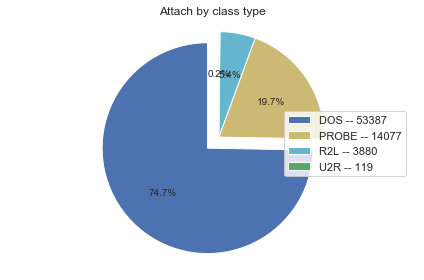

In [22]:
colors = ['b', 'y', 'c', 'g','r']

labels= attackbyclass['class'] + " -- " + attackbyclass['cnt']
# Create a pie chart
plt.pie(
    attackbyclass.attack_class,
    shadow=False,
    colors=colors,
    autopct='%1.1f%%',
    explode=(0.15,0,0,0),
    startangle=90,
    )

plt.title('Attack by class type')
plt.legend(labels, loc=5)

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

You can see that DOS class type 74.7% as the toppest among other attack types.

In [23]:
##Let us further explore which of the Attack class has top in the 'DOS' attack type
nad_df_attack_dos =    nad_df.loc[(nad_df['attack'] == 1) & (nad_df['attack_class'] == 1)]
nad_df_attack_probe =    nad_df.loc[(nad_df['attack'] == 1) & (nad_df['attack_class'] == 2)]
nad_df_attack_r2l =    nad_df.loc[(nad_df['attack'] == 1) & (nad_df['attack_class'] == 3)]
nad_df_attack_u2r =    nad_df.loc[(nad_df['attack'] == 1) & (nad_df['attack_class'] == 4)]
p1 = plotInfo("attack_type",0,'center')

### <a id = '3.2'> 3.2. Plotchart - Network Attack by DOS Class </a>

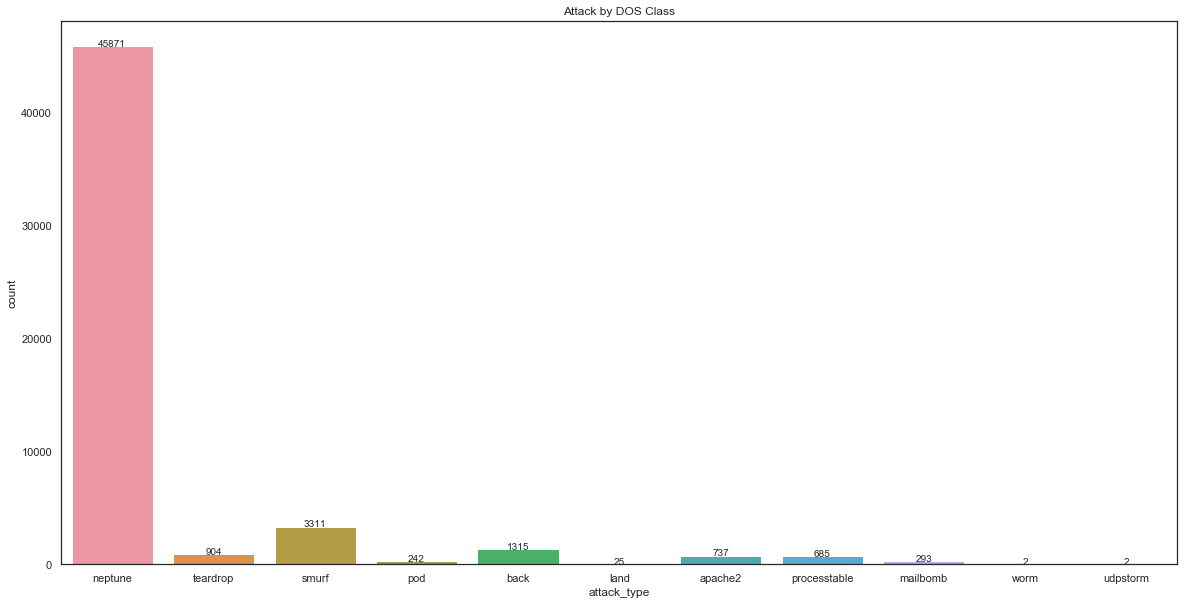

In [24]:
univariateplot("count",[p1],nad_df_attack_dos,'Attack by DOS Class',n=1)

You can see that neptune attack type as the toppest among other attack types.

### <a id = '3.3'> 3.3. Plotchart - Network Attack by PROBE Class </a>

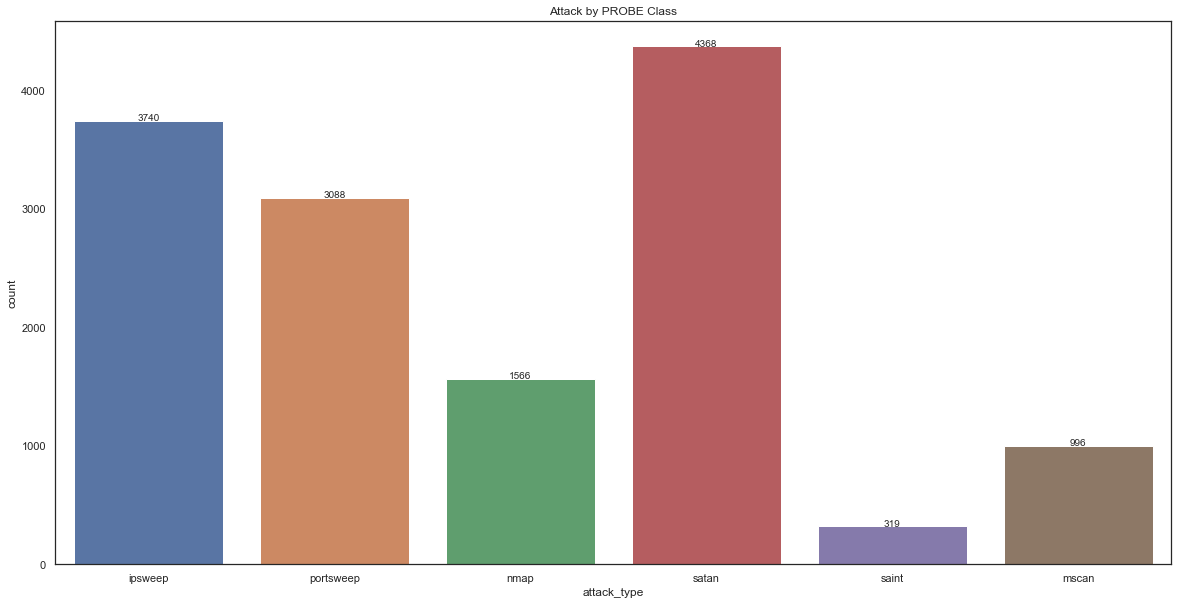

In [25]:
#plot for other attack type
univariateplot("count",[p1],nad_df_attack_probe,'Attack by PROBE Class',n=1)

### <a id = '3.4'> 3.4. Plotchart - Network Attack by R2L Class </a>

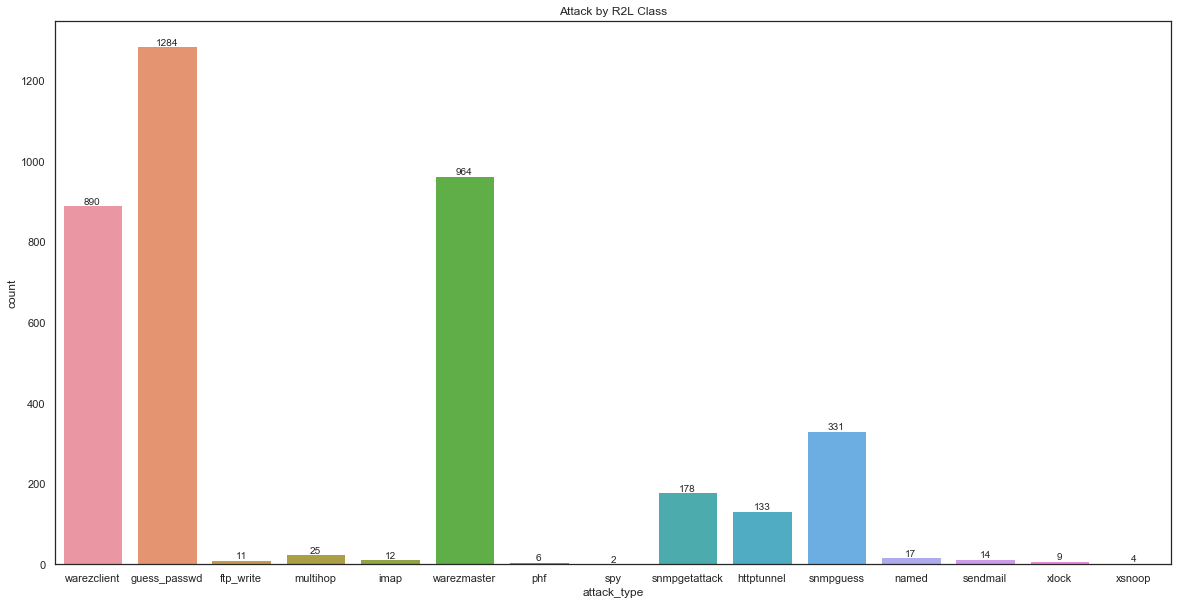

In [26]:
univariateplot("count",[p1],nad_df_attack_r2l,'Attack by R2L Class',n=1)

### <a id = '3.5'> 3.5. Plotchart - Network Attack by U2R Class </a>

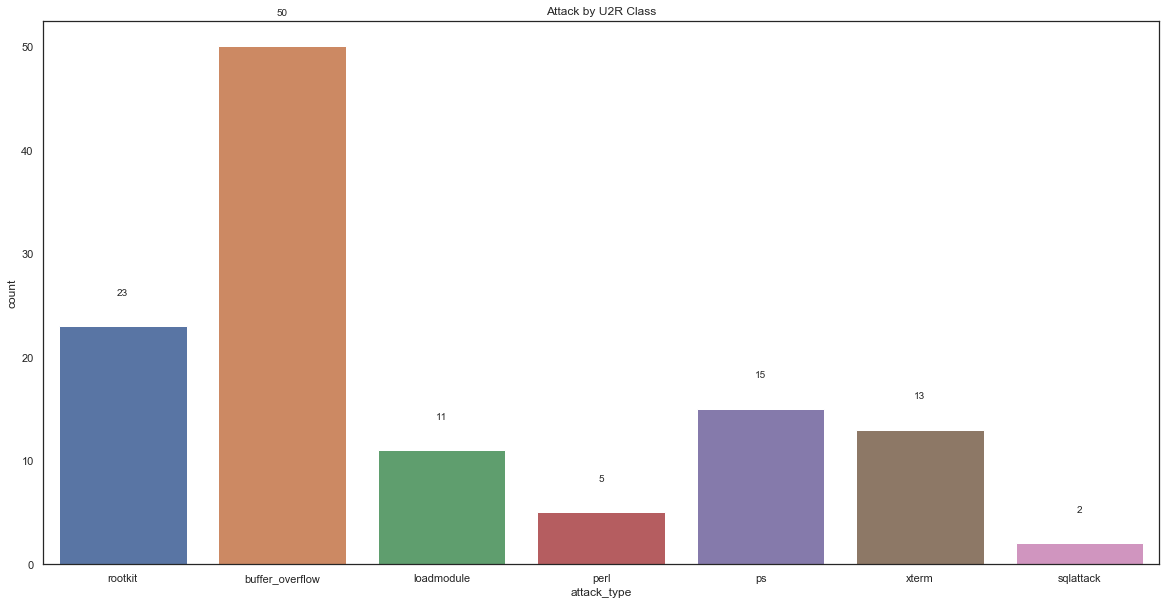

In [27]:
univariateplot("count",[p1],nad_df_attack_u2r,'Attack by U2R Class',n=1)

### <a id = '3.6'> 3.6. Segmented Plotchart - Network Attack by Protocol Type </a>

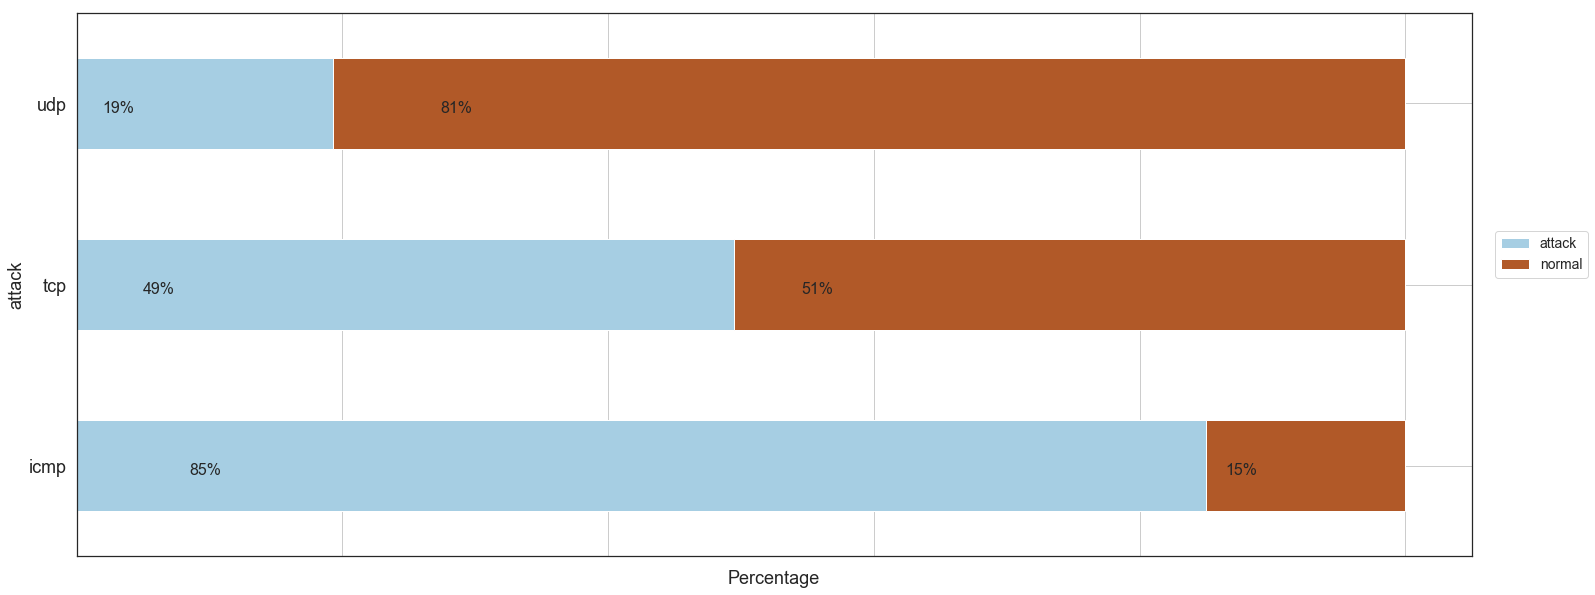

In [28]:
## segemented plot based on the protocol type
attackbyprotocoltype = nad_df.groupby(['protocol_type','attack_display'])['attack_display'].count()
segmentedPlot(attackbyprotocoltype,'barh',"attack","attack",display_value=1)

You can see that icmp protocol type as the toppest among other protocol types.

### <a id = '3.7'> 3.7. Correlation of Features </a>

In [29]:
## Find out correlation of all features
corrmatrix = pd.DataFrame(nad_df)
corr = corrmatrix.corr()
cmap = cmap=sns.diverging_palette(6, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '180px', 'font-size': '10pt'})\
    .set_precision(2)\

In [30]:
#Let us find the only the correlation which are > 0.85
corr_matrix = corrmatrix.corr().abs()
upperrows = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
highcorr = [column for column in upperrows.columns if any(upperrows[column] > 0.85)]

In [31]:
## Find out correlation by key variables
corrmatrix = pd.DataFrame(nad_df[highcorr])
corr = corrmatrix.corr()
cmap = cmap=sns.diverging_palette(6, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '180px', 'font-size': '10pt'})\
    .set_precision(2)\

,num_root,srv_serror_rate,srv_rerror_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
num_root,1,-0.0051,-0.0043,-0.0062,-0.0042,-0.0047,-0.0042,-0.0038,-0.0088
srv_serror_rate,-0.0051,1,-0.23,-0.58,0.97,0.98,-0.23,-0.23,0.28
srv_rerror_rate,-0.0043,-0.23,1,-0.3,-0.23,-0.23,0.91,0.97,0.29
dst_host_same_srv_rate,-0.0062,-0.58,-0.3,1,-0.61,-0.6,-0.31,-0.31,-0.46
dst_host_serror_rate,-0.0042,0.97,-0.23,-0.61,1,0.98,-0.23,-0.23,0.29
dst_host_srv_serror_rate,-0.0047,0.98,-0.23,-0.6,0.98,1,-0.23,-0.23,0.29
dst_host_rerror_rate,-0.0042,-0.23,0.91,-0.31,-0.23,-0.23,1,0.92,0.28
dst_host_srv_rerror_rate,-0.0038,-0.23,0.97,-0.31,-0.23,-0.23,0.92,1,0.3
attack_class,-0.0088,0.28,0.29,-0.46,0.29,0.29,0.28,0.3,1


### <a id = '3.8'> 3.8. Summary </a>

dst_host_serror_rate is high correlated with srv_serror_rate


dst_host_srv_serror_rate  is high correlated with srv_serror_rate


dst_host_rerror_rate is high correlated with srv_rerror_rate


dst_host_srv_rerror_rate is high correlated with srv_rerror_rate

In [172]:
# Make a copy of the dataset and we will need them to multivariable analysis
nad_df_copy = nad_df
# remove the features that were added to display in the plots
nad_df = nad_df.drop(['attack_type','attack_class','attack_display','attack_class_display'], axis =1)

In [173]:
nad_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0


In [174]:
## Conver the categorical features in to numerical features.
## let us use the one hot encoding method to do the same
nad_df = pd.get_dummies(nad_df)

In [175]:
nad_df.shape

(148517, 124)

In [176]:
## Check the dataset where data are spread across for both clauses
## we can see thata dataset is balanced.
attack = (sum(nad_df['attack'])/len(nad_df['attack'].index))*100
attack

48.11772389692762

In [177]:
# Let us make we have balanced dataset before proceed for modelling
nad_df.attack.sum()

71463

## <a id = '5'> 5. Binomial Classification </a>

In [178]:
## Create indepenednet and depenedent feature vectors from the dataset.
X=nad_df.drop(['attack'],axis=1)
y=nad_df['attack']

In [179]:
## Split the dataset to train and test 70% and 30% ratio
#### Perform Normalization for all numerical features using in built standard scalar
X_train, X_test, ytrain, ytest = train_test_split(X, y,test_size = 0.3, random_state = 4)
sc=StandardScaler()
Xtrain=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
Xtest=pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [180]:
## check the shape
Xtest.shape

(44556, 123)

In [181]:
## check the shape
ytest.shape

(44556,)

In [182]:
####define a function to calculate Variable influnce factor
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        x_withC = sm.add_constant(x)
        rsq=sm.OLS(y,x_withC).fit().rsquared  
        if rsq==1: rsq=0.99999
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### <a id = '5.1'> 5.1. Logistic Regression with Recurvise Feature Elimination </a>

In [185]:
#Apply Linear Regression and use RFE to keep only 12 features which are more releavant.
logreg = LogisticRegression()
start=time.time()
rfe = RFE(logreg, 12)            
rfe = rfe.fit(Xtrain, ytrain)
print(rfe.support_)           
print(rfe.ranking_)           
print(time.time()-start , 'seconds to run')

[False False False False False False False False False  True False False
  True False False False False False False  True  True False  True False
  True False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False  True False]
[ 65  80  90  86  58  99  94  88  23   1 105  74   1  66 110  82 112 104
  77   1   1  16   1  20   1  21  68  14   3   2   1  73  12  55  61  29
   7  54   1  10   8  22  18  83  38 106  70  39  24  50  36  45  49  72
   1  47   4   5  33  31  62  7

In [186]:
#Find out the columns that are more relevant
cols_rfe=Xtrain.columns[rfe.support_]
cols_rfe

Index(['num_compromised', 'num_root', 'count', 'srv_count', 'srv_serror_rate',
       'srv_rerror_rate', 'dst_host_same_srv_rate', 'last_flag',
       'service_domain_u', 'service_http', 'flag_S0', 'flag_SF'],
      dtype='object')

In [187]:
#Calculate the infulence factor and print results
logm1 = sm.GLM(list(ytrain),(sm.add_constant(Xtrain[cols_rfe])), family = sm.families.Binomial())
print(logm1.fit().summary())
print(vif_cal(Xtrain[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               103961
Model:                            GLM   Df Residuals:                   103948
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -14661.
Date:                Thu, 07 Mar 2019   Deviance:                       29323.
Time:                        20:15:38   Pearson chi2:                 1.19e+14
No. Iterations:                    11                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2553      0.046      5.555      0.000       0.165       0.345
num_compromised 

In [188]:
#Calculate VIF and print results
# Let us drop num_root has it's has high VIF
cols_rfe=['num_compromised','count', 'srv_count', 'srv_serror_rate',
       'srv_rerror_rate', 'dst_host_same_srv_rate', 'last_flag',
       'service_domain_u', 'service_http', 'flag_S0', 'flag_SF']

logm2 = sm.GLM(list(ytrain),(sm.add_constant(Xtrain[cols_rfe])), family = sm.families.Binomial())
logm2.fit().summary()
print(logm2.fit().summary())
print(vif_cal(Xtrain[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               103961
Model:                            GLM   Df Residuals:                   103949
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -14729.
Date:                Thu, 07 Mar 2019   Deviance:                       29458.
Time:                        20:15:49   Pearson chi2:                 4.26e+08
No. Iterations:                    10                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2861      0.046      6.234      0.000       0.196       0.376
num_compromised 

In [189]:
#Calculate VIF and print results
# Let us flag_SF has it's has high VIF
cols_rfe=['num_compromised','count', 'srv_count', 'srv_serror_rate',
       'srv_rerror_rate', 'dst_host_same_srv_rate', 'last_flag',
       'service_domain_u', 'service_http', 'flag_S0']

logm2 = sm.GLM(list(ytrain),(sm.add_constant(Xtrain[cols_rfe])), family = sm.families.Binomial())
logm2.fit().summary()
print(logm2.fit().summary())
print(vif_cal(Xtrain[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               103961
Model:                            GLM   Df Residuals:                   103950
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -14954.
Date:                Thu, 07 Mar 2019   Deviance:                       29909.
Time:                        20:15:58   Pearson chi2:                 4.10e+08
No. Iterations:                    10                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2328      0.045      5.167      0.000       0.145       0.321
num_compromised 

In [190]:
#Calculate VIF and print results
# Let us srv_serror_rate   has it's has high VIF

cols_rfe=['num_compromised','count', 'srv_count', 
       'srv_rerror_rate', 'dst_host_same_srv_rate', 'last_flag',
       'service_domain_u', 'service_http', 'flag_S0']

logm2 = sm.GLM(list(ytrain),(sm.add_constant(Xtrain[cols_rfe])), family = sm.families.Binomial())
logm2.fit().summary()
print(logm2.fit().summary())
print(vif_cal(Xtrain[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               103961
Model:                            GLM   Df Residuals:                   103951
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15279.
Date:                Thu, 07 Mar 2019   Deviance:                       30559.
Time:                        20:16:07   Pearson chi2:                 4.47e+08
No. Iterations:                    11                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2151      0.045      4.797      0.000       0.127       0.303
num_compromised 

#### The P value and VIF is in control. So, Let us now baseline this and proceed with Model Evalution

### Logistic Regression Model Evaluation



In [191]:
# LR without hyperparameter tunning
log_updated= LogisticRegression()
log_updated.fit(Xtrain[cols_rfe], (ytrain))
predictions = log_updated.predict(Xtest[cols_rfe])
probas=log_updated.predict_proba(Xtest[cols_rfe])
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->" ,accuracy_score(ytest,predictions))
print("AUC->",metrics.roc_auc_score(ytest,probas[:, 1]))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95     23242
          1       0.95      0.95      0.95     21314

avg / total       0.95      0.95      0.95     44556

[[22212  1030]
 [ 1077 20237]]
Accuracy-> 0.952711194900799
AUC-> 0.9864205364307127


#### By using RFE the LR Model gives acc - 95.2% and AUC is 98.6

### <a id = '5.2'> 5.2. Logistic Regression with PCA </a>

In [56]:
####Find out the best features that has 90% of the variance
pca = PCA(0.90,random_state=4)

In [57]:
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=4,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pca.components_

array([[ 9.24391336e-03,  1.46722327e-04,  5.33574674e-04, ...,
         6.39723674e-03, -3.00511923e-01,  1.65795473e-02],
       [ 9.02950335e-02,  4.44958896e-03,  6.54361337e-03, ...,
        -6.57275928e-03, -7.34287800e-02, -6.41625229e-03],
       [-2.23534948e-02, -8.22759743e-05, -1.06672899e-03, ...,
         7.28522148e-03, -4.67364686e-02, -1.67064256e-02],
       ...,
       [-3.17736962e-02, -6.95685208e-03,  2.15081125e-01, ...,
         2.88474560e-01, -2.01898721e-02, -1.48603322e-01],
       [ 2.85709831e-02, -4.76610483e-03, -1.53007272e-01, ...,
        -4.38585607e-01,  1.91463163e-03,  8.14375662e-02],
       [ 8.57593732e-04,  1.05401594e-01,  1.06681121e-02, ...,
         4.65013443e-02, -2.20399019e-03,  2.71420231e-01]])

In [59]:
####Number of PC features required to explain 90% of the variance
pca.n_components_

82

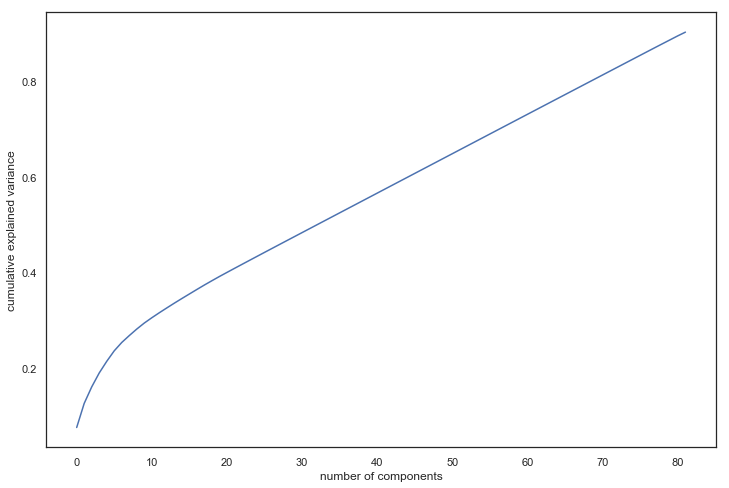

In [61]:
## plot the PCA components features vs CEV. 
## we are getting 90% varirable for around 80+ components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [63]:
####PC components of training and test set
Xtrainpc = pca.transform(Xtrain)
Xtestpc = pca.transform(Xtest)

In [64]:
####Logistic regression model on top of PCA
log_updatedpca= LogisticRegression(class_weight= 'balanced')
log_updatedpca.fit(Xtrainpc, (ytrain))
predictions = log_updatedpca.predict(Xtestpc)
probas=log_updatedpca.predict_proba(Xtestpc)
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->" ,accuracy_score(ytest,predictions))
print("AUC->",metrics.roc_auc_score(ytest,probas[:, 1]))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97     23242
          1       0.96      0.98      0.97     21314

avg / total       0.97      0.97      0.97     44556

[[22454   788]
 [  481 20833]]
Accuracy-> 0.9715189873417721
AUC-> 0.9918747262757817


#### By using PCA the LR Model gives acc - 97.1% and AUC is 99.1 - Slightly better than PCA with RFE

### <a id = '5.3'> 5.3. Random Forest with PCA </a>

In [67]:
rfc = RandomForestClassifier(random_state=4, verbose=1)
rfc.fit(Xtrainpc,ytrain)
predictions = rfc.predict(Xtestpc)
probas=rfc.predict_proba(Xtestpc)
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->", accuracy_score(ytest,predictions))
print("AUC->",metrics.roc_auc_score(ytest,probas[:, 1]))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23242
          1       1.00      1.00      1.00     21314

avg / total       1.00      1.00      1.00     44556

[[23183    59]
 [   59 21255]]
Accuracy-> 0.9973516473651136
AUC-> 0.9997330019314385


#### By using PCA the Random forest Model gives acc - 99.7% and AUC is 99.9 - better of all other models
#### We might not required to tune the hyper parameter as the F1,Recall,Precision , Acc and AUC are in control

### <a id = '5.4'> 5.4. Random Forest without PCA</a>

In [192]:
rfc = RandomForestClassifier(random_state=4, verbose=1)
rfc.fit(Xtrain,ytrain)
predictions = rfc.predict(Xtest)
probas=rfc.predict_proba(Xtest)
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->", accuracy_score(ytest,predictions)) 
print("AUC->",metrics.roc_auc_score(ytest,probas[:, 1]))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23242
          1       1.00      1.00      1.00     21314

avg / total       1.00      1.00      1.00     44556

[[23218    24]
 [   30 21284]]
Accuracy-> 0.9987880420145435
AUC-> 0.9999920172390977


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


### <a id = '5.5'> 5.5. Summary </a>

The Random Forest Model outperforms all other model with High Accuracy and High AUC

### <a id = '5.6'> 5.6. Key Anomaly Indicators </a>

In [ ]:
sfm = SelectFromModel(rfc, threshold=0.015) 
sfm.fit(Xtrain,ytrain)

Xtrain_1 = sfm.transform(Xtrain)
Xtest_1 = sfm.transform(Xtest)

shape = np.shape(Xtrain_1)

print(Xtrain.columns[sfm.get_support()]) 

## <a id = '6'> 6. Multinomial  Classification </a>

In [72]:
#Copy the dataframe that we have created earlier
nad_df_multi = nad_df_copy

In [73]:
nad_df_multi.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,last_flag,attack,attack_class,attack_display,attack_class_display
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.00,0.05,0.00,normal,20,0,0,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,normal,15,0,0,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,neptune,19,1,1,attack,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.01,0.00,0.01,normal,21,0,0,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,normal,21,0,0,normal,normal


In [74]:
#drop the features which are created for EDA display purpose
nad_df_multi = nad_df_multi.drop(['attack_type','attack','attack_display','attack_class_display'], axis =1)

In [75]:
nad_df_multi.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0


In [76]:
## Conver the categorical features in to numerical features.
## let us use the one hot encoding method to do the same
nad_df_multi = pd.get_dummies(nad_df_multi)

In [77]:
## Create indepenednet and depenedent feature vectors from the dataset.
X=nad_df_multi.drop(['attack_class'],axis=1)
y=nad_df_multi['attack_class']

In [78]:
#### Perform Normalization 
X_train, X_test, ytrain, ytest = train_test_split(X, y,test_size = 0.3, random_state = 4)
sc=StandardScaler()
Xtrain=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
Xtest=pd.DataFrame(sc.transform(X_test),columns=X.columns)

### <a id = '6.1'> 6.1. Logistic Regression Model with Recurvise Feature Elimination  </a>

In [85]:
## Perform LR and use the RFE to find out the best 12 features 
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
start=time.time()
rfe = RFE(logreg, 12)            
rfe = rfe.fit(Xtrain, ytrain)
print(rfe.support_)           
print(rfe.ranking_)           
print(time.time()-start , 'seconds to run')

[False  True False False  True False  True False False False False False
  True  True False False False False  True  True  True False False False
 False False False False False False False False False False False False
 False False False  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[  6   1  33  63   1  96   1  25  34  47  23  55   1   1  98  41 112 100
   1   1   1  31   3  12  19   2  17  20  10  14   5  43  15  44   8  11
   9  26   4   1   1   1  56  64  81 109  42  86  76  89  60  73  77  53
  32  70  22  35  72  62  21  2

In [121]:
## Please note the model took around 5 hours to run
## Hence i have stored in the pickle file and later for reuse 
#import pickle
#f = open('multi_class_rfe.pickle', 'wb')
#pickle.dump(rfe,f)
#print('Classifier imported from ', f.name)
#f.close()

Classifier imported from  multi_class_rfe.pickle


In [43]:
cols_rfe=Xtrain.columns[rfe.support_]
cols_rfe

Index(['src_bytes', 'wrong_fragment', 'hot', 'num_root', 'num_file_creations',
       'is_guest_login', 'count', 'srv_count', 'protocol_type_icmp',
       'protocol_type_tcp', 'protocol_type_udp', 'service_http'],
      dtype='object')

In [122]:
#Load from pickle file to save time
#f1 = open('multi_class_rfe.pickle', 'rb')
#rfe1 = pickle.load(f1)
#f.close()

In [124]:
#Calculate VIF and print results
logm1 = sm.GLM(list(ytrain),(sm.add_constant(Xtrain[cols_rfe])))
print(logm1.fit().summary())
print(vif_cal(Xtrain[cols_rfe]))

                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                103961
Model:                            GLM   Df Residuals:                    103949
Model Family:                Gaussian   Df Model:                            11
Link Function:               identity   Scale:              0.36289901114491274
Method:                          IRLS   Log-Likelihood:                 -94819.
Date:                Thu, 07 Mar 2019   Deviance:                        37723.
Time:                        18:51:26   Pearson chi2:                  3.77e+04
No. Iterations:                     2                                          
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6344      0.002    339.537      0.000       0.631       0.638
src_bytes          

In [125]:
#Calculate VIF and print results
# Let us drop 'protocol_type_icmp'   has it's has high VIF
cols_rfe=['src_bytes', 'wrong_fragment', 'hot', 'num_root', 'num_file_creations',
       'is_guest_login', 'count', 'srv_count', 
       'protocol_type_tcp', 'protocol_type_udp', 'service_http']

logm2 = sm.GLM(list(ytrain),(sm.add_constant(Xtrain[cols_rfe])))
logm2.fit().summary()
print(logm2.fit().summary())
print(vif_cal(Xtrain[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               103961
Model:                            GLM   Df Residuals:                   103949
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:              0.3628951945598976
Method:                          IRLS   Log-Likelihood:                -94819.
Date:                Thu, 07 Mar 2019   Deviance:                       37723.
Time:                        18:51:40   Pearson chi2:                 3.77e+04
No. Iterations:                     2                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6344      0.002    339.538      0.000       0.631       0.638
src_bytes              0.006

Now P value and VIF is under control , let us baseline it

In [126]:
#User defined function to calcuate AUC score for multiclass 
def roc_auc_score_for_multiclass(actual_class, pred_class, average = "macro"):
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    other_class = [x for x in unique_class if x != per_class]

    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    roc_auc = metrics.roc_auc_score(new_actual_class, new_pred_class)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [127]:
# Perform LR with multinomial and user newton-cg as solver
log_updated= LogisticRegression(multi_class='multinomial', solver='newton-cg' ,class_weight= 'balanced')
log_updated.fit(Xtrain[cols_rfe], (ytrain))
predictions = log_updated.predict(Xtest[cols_rfe])
probas=log_updated.predict_proba(Xtest[cols_rfe])
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->" ,accuracy_score(ytest,predictions))
lr_roc_auc_multiclass = roc_auc_score_for_multiclass(ytest,probas[:, 1])
print("AUC->",lr_roc_auc_multiclass)

             precision    recall  f1-score   support

          0       0.95      0.69      0.80     23242
          1       0.92      0.81      0.86     16076
          2       0.45      0.51      0.48      4113
          3       0.12      0.96      0.21      1095
          4       0.08      0.80      0.15        30

avg / total       0.87      0.72      0.78     44556

[[15926   670   618  5835   193]
 [  706 13000  1912   431    27]
 [   82   479  2112  1421    19]
 [    5     4     1  1052    33]
 [    0     0     1     5    24]]
Accuracy-> 0.7207559026842625
AUC-> {0: 0.5146148071689969, 1: 0.5000702247191011, 2: 0.5073498639330899, 3: 0.507213363705391, 4: 0.507040830076809}


#### By using RFE the LR MultiClass Model gives acc - 72.0% and AUC is 50.0 

### <a id = '6.2'> 6.2. Logistic Regression Model Building with PCA  </a>

In [130]:
####PCA explaining 90% of the variance
pca = PCA(0.90,random_state=4)

In [131]:
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=4,
  svd_solver='auto', tol=0.0, whiten=False)

In [132]:
pca.n_components_

82

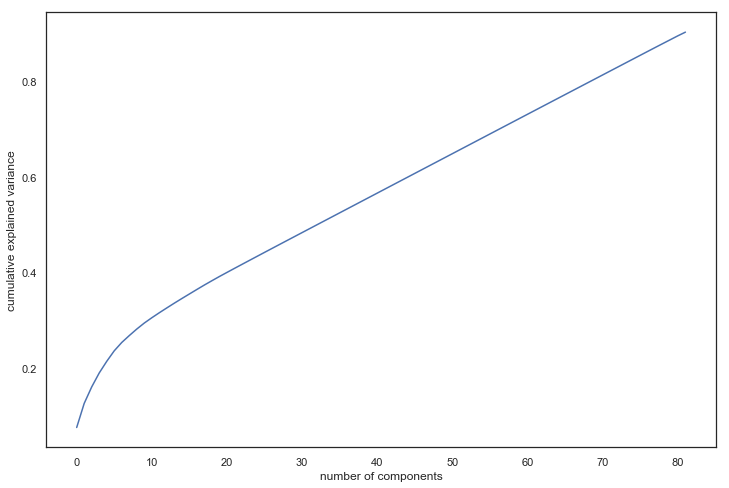

In [133]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [134]:
####PC components of training and test set
Xtrainpc = pca.transform(Xtrain)
Xtestpc = pca.transform(Xtest)

In [135]:
####Logistic regression model on top of PCA
log_updatedpca= LogisticRegression(multi_class='multinomial', solver='newton-cg' ,class_weight= 'balanced')
log_updatedpca.fit(Xtrainpc, (ytrain))
predictions = log_updatedpca.predict(Xtestpc)
probas=log_updatedpca.predict_proba(Xtestpc)
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->" ,accuracy_score(ytest,predictions))
lr_roc_auc_multiclass = roc_auc_score_for_multiclass(ytest,probas[:, 1])
print("AUC->",lr_roc_auc_multiclass)

             precision    recall  f1-score   support

          0       0.99      0.96      0.97     23242
          1       0.98      0.98      0.98     16076
          2       0.90      0.97      0.93      4113
          3       0.73      0.89      0.80      1095
          4       0.15      0.93      0.26        30

avg / total       0.97      0.97      0.97     44556

[[22341   214   346   301    40]
 [  270 15700    89     3    14]
 [   36    34  3982    55     6]
 [   13     0     9   978    95]
 [    0     1     0     1    28]]
Accuracy-> 0.9657285214112578
AUC-> {0: 0.5, 1: 0.5000877808988764, 2: 0.5000618153945058, 3: 0.5000575228365661, 4: 0.5000561469703095}


#### By using PCA the LR MultiClass Model gives acc - 96.0% and where as AUC is still around 50.0 

### <a id = '6.3'> 6.3. Random Forest with PCA  </a>

In [139]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=4, verbose=1)
rfc.fit(Xtrainpc,ytrain)
predictions = rfc.predict(Xtestpc)
probas=rfc.predict_proba(Xtestpc)
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->", accuracy_score(ytest,predictions)) 
lr_roc_auc_multiclass = roc_auc_score_for_multiclass(ytest,probas[:, 1])
print("AUC->",lr_roc_auc_multiclass)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23242
          1       1.00      1.00      1.00     16076
          2       0.99      0.99      0.99      4113
          3       0.98      0.97      0.97      1095
          4       0.79      0.50      0.61        30

avg / total       1.00      1.00      1.00     44556

[[23210     6     9    16     1]
 [   15 16058     3     0     0]
 [   26    15  4071     1     0]
 [   23     2     8  1059     3]
 [    5     0     1     9    15]]
Accuracy-> 0.99679055570518
AUC-> {0: 0.8708595289481093, 1: 0.9911637156791756, 2: 0.515891885767748, 3: 0.504341035719948, 4: 0.5081210977855636}


#### The Random forest with PCA LR MultiClass Model gives acc - 99.0% and where as AUC is much better compared to other models

### <a id = '6.4'> 6.4. Random Forest without PCA  </a>

In [142]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=4, verbose=1)
rfc.fit(Xtrain,ytrain)
predictions = rfc.predict(Xtest)
probas=rfc.predict_proba(Xtest)
print(classification_report(ytest,predictions))
print(confusion_matrix(ytest,predictions))
print("Accuracy->", accuracy_score(ytest,predictions)) 
lr_roc_auc_multiclass = roc_auc_score_for_multiclass(ytest,probas[:, 1])
print("AUC->",lr_roc_auc_multiclass)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23242
          1       1.00      1.00      1.00     16076
          2       1.00      1.00      1.00      4113
          3       0.99      0.98      0.98      1095
          4       0.90      0.60      0.72        30

avg / total       1.00      1.00      1.00     44556

[[23226     4     5     7     0]
 [    8 16064     4     0     0]
 [   10     1  4101     1     0]
 [   19     0     1  1073     2]
 [    3     1     0     8    18]]
Accuracy-> 0.9983391686865967
AUC-> {0: 0.8729238997841794, 1: 0.9949653864998002, 2: 0.5071330636829499, 3: 0.5007590177684103, 4: 0.5448344787315277}


#### The Random forest without PCA LR MultiClass Model gives acc - 99.0% and where as AUC is much better compared to Random forest with PCA

### <a id = '6.5'> 6.5. Summary </a>

The Random Forest Model outperforms all other model with High Accuracy and High AUC

### <a id = '6.6'> 6.6. Key Anomaly Indicators </a>

In [144]:
sfm = SelectFromModel(rfc, threshold=0.015) 
sfm.fit(Xtrain,ytrain)

Xtrain_1 = sfm.transform(Xtrain)
Xtest_1 = sfm.transform(Xtest)

shape = np.shape(Xtrain_1)

print(Xtrain.columns[sfm.get_support()]) 

Index(['duration', 'src_bytes', 'dst_bytes', 'root_shell', 'count',
       'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'last_flag',
       'protocol_type_icmp', 'service_eco_i', 'service_http',
       'service_private', 'service_telnet', 'flag_S0', 'flag_SF'],
      dtype='object')


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished


## <a id = '7'> 7. Summary of Modles  </a>

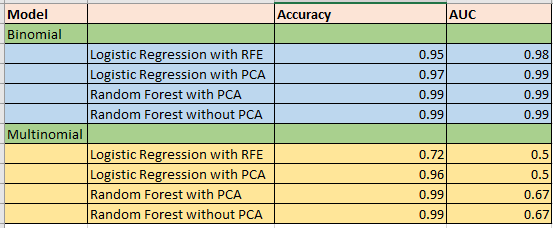

In Both cases the Random Forest Models performs better with High Accuracy and Moderate AUC

## <a id = '8'> 8. Business recommendations  </a>